# Student Id : C0900481   

# Name: Jumoke Yekeen
# Course: AML3104

**The aim of this assignment is to process and clean the dataset, generate visualizations, and derive insights from the Algerian forest fire dataset by analyzing the Fire Weather Index (FWI). This analysis will involve utilizing multiple linear regression, polynomial regression, and regularization models. Additionally, the assignment will include performing cross-validation and hyperparameter tuning to evaluate the model's performance. After developing the model, you will create pickle files and test the model on unseen data.**

In [1]:
#import  Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
# Upload the dataset

df = pd.read_csv('/content/Algerian_forest_fires_cleaned.csv')

#display of first 5 rowa
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


**DATA DESCRIPTION**

Date: (DD/MM/YYYY) Day, month ('June' to 'September'), year (2012) Weather data observations
Temp: temperature noon (temperature max) in Celsius degrees: 22 to 42

RH: Relative Humidity in %: 21 to 90

Ws: Wind speed in km/h: 6 to 29

Rain: total day in mm: 0 to 16.8

FIRE WEATHER INDEX (FWI) Components

Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5

Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9

Drought Code (DC) index from the FWI System: 7 to 220.4

Initial Spread Index (ISI) index from the FWI system: 0 to 18.5

Buildup Index (BUI) index from the FWI system: 1.1 to 68

Fire Weather Index (FWI) Index: 0 to 31.1

Classes: two classes, namely fire and not fire


# **Data cleaning (handling missing values, remove duplicates)**

In [ ]:

# Display Information about the dataset colunns (datatypes, number of data and names)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [ ]:
# Statistics summary of the dataframe

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,243.0,32.152263,3.628039,22.0,30.00,32.0,35.00,42.0
RH,243.0,62.041152,14.828160,21.0,52.50,63.0,73.50,90.0
Ws,243.0,15.493827,2.811385,6.0,14.00,15.0,17.00,29.0
Rain,243.0,0.762963,2.003207,0.0,0.00,0.0,0.50,16.8
FFMC,243.0,77.842387,14.349641,28.6,71.85,83.3,88.30,96.0
DMC,243.0,14.680658,12.393040,0.7,5.80,11.3,20.80,65.9
DC,243.0,49.430864,47.665606,6.9,12.35,33.1,69.10,220.4
ISI,243.0,4.742387,4.154234,0.0,1.40,3.5,7.25,19.0
BUI,243.0,16.690535,14.228421,1.1,6.00,12.4,22.65,68.0
FWI,243.0,7.035391,7.440568,0.0,0.70,4.2,11.45,31.1


In [ ]:

# checking missing values for each column

df.isnull().sum()

Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [ ]:
#Display the columns
df.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'Region'],
      dtype='object')

In [ ]:
#Display number of rows and columns of the dataframe
df.shape

(243, 12)

In [ ]:
#Display of Duplicates

df.duplicated().sum()

0

# Data Visualisation

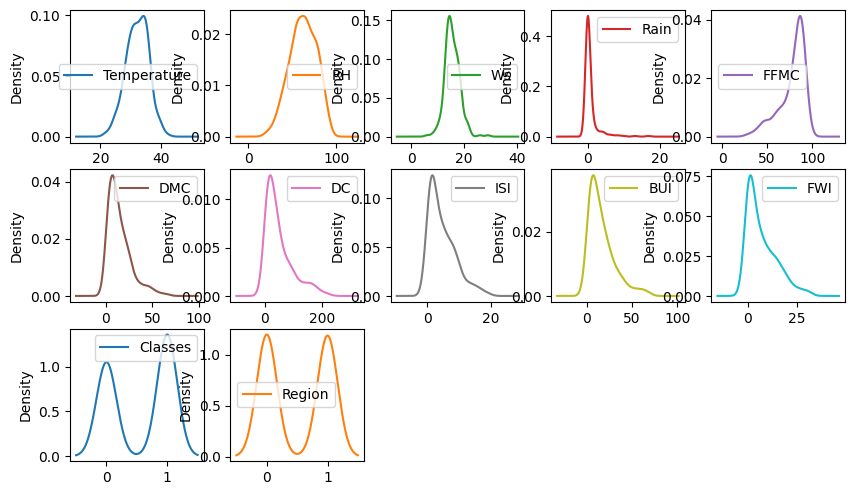

In [ ]:
# Density plot for all features

df.plot(kind='density', subplots=True, layout=(5,5), sharex=False, figsize=(10,10))
plt.show()

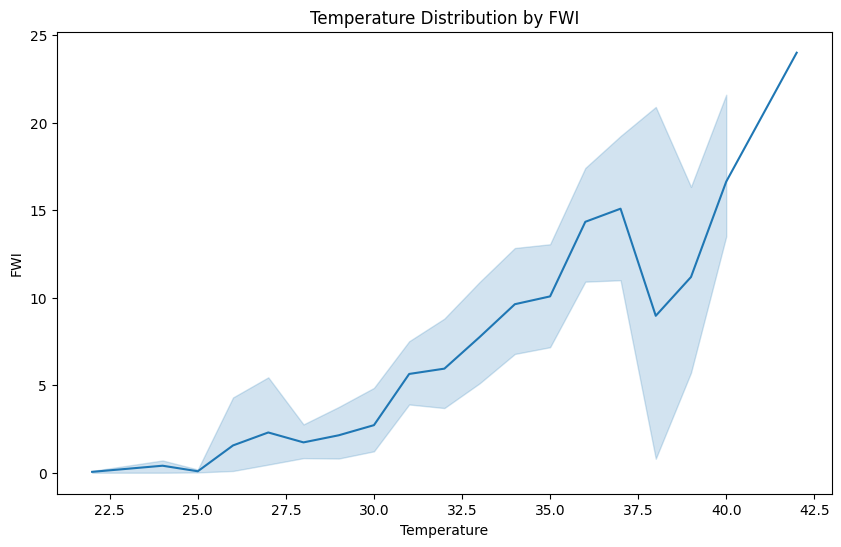

In [ ]:
# Line graph Temperature VS FWI

plt.figure(figsize=(10, 6))
sns.lineplot(x='Temperature', y='FWI', data=df)
plt.xlabel('Temperature')
plt.ylabel('FWI')
plt.title('Temperature Distribution by FWI')
plt.show()

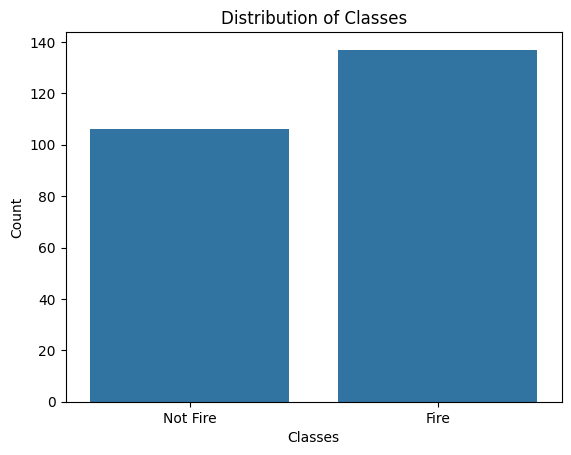

In [ ]:
# Bar chart for the column classes
plt.figfigsize=(10,10)
sns.countplot(x='Classes', data=df)
plt.title('Distribution of Classes')
plt.xticks(ticks=[0,1], labels=['Not Fire', 'Fire'])
plt.xlabel('Classes')
plt.ylabel('Count')
plt.show()

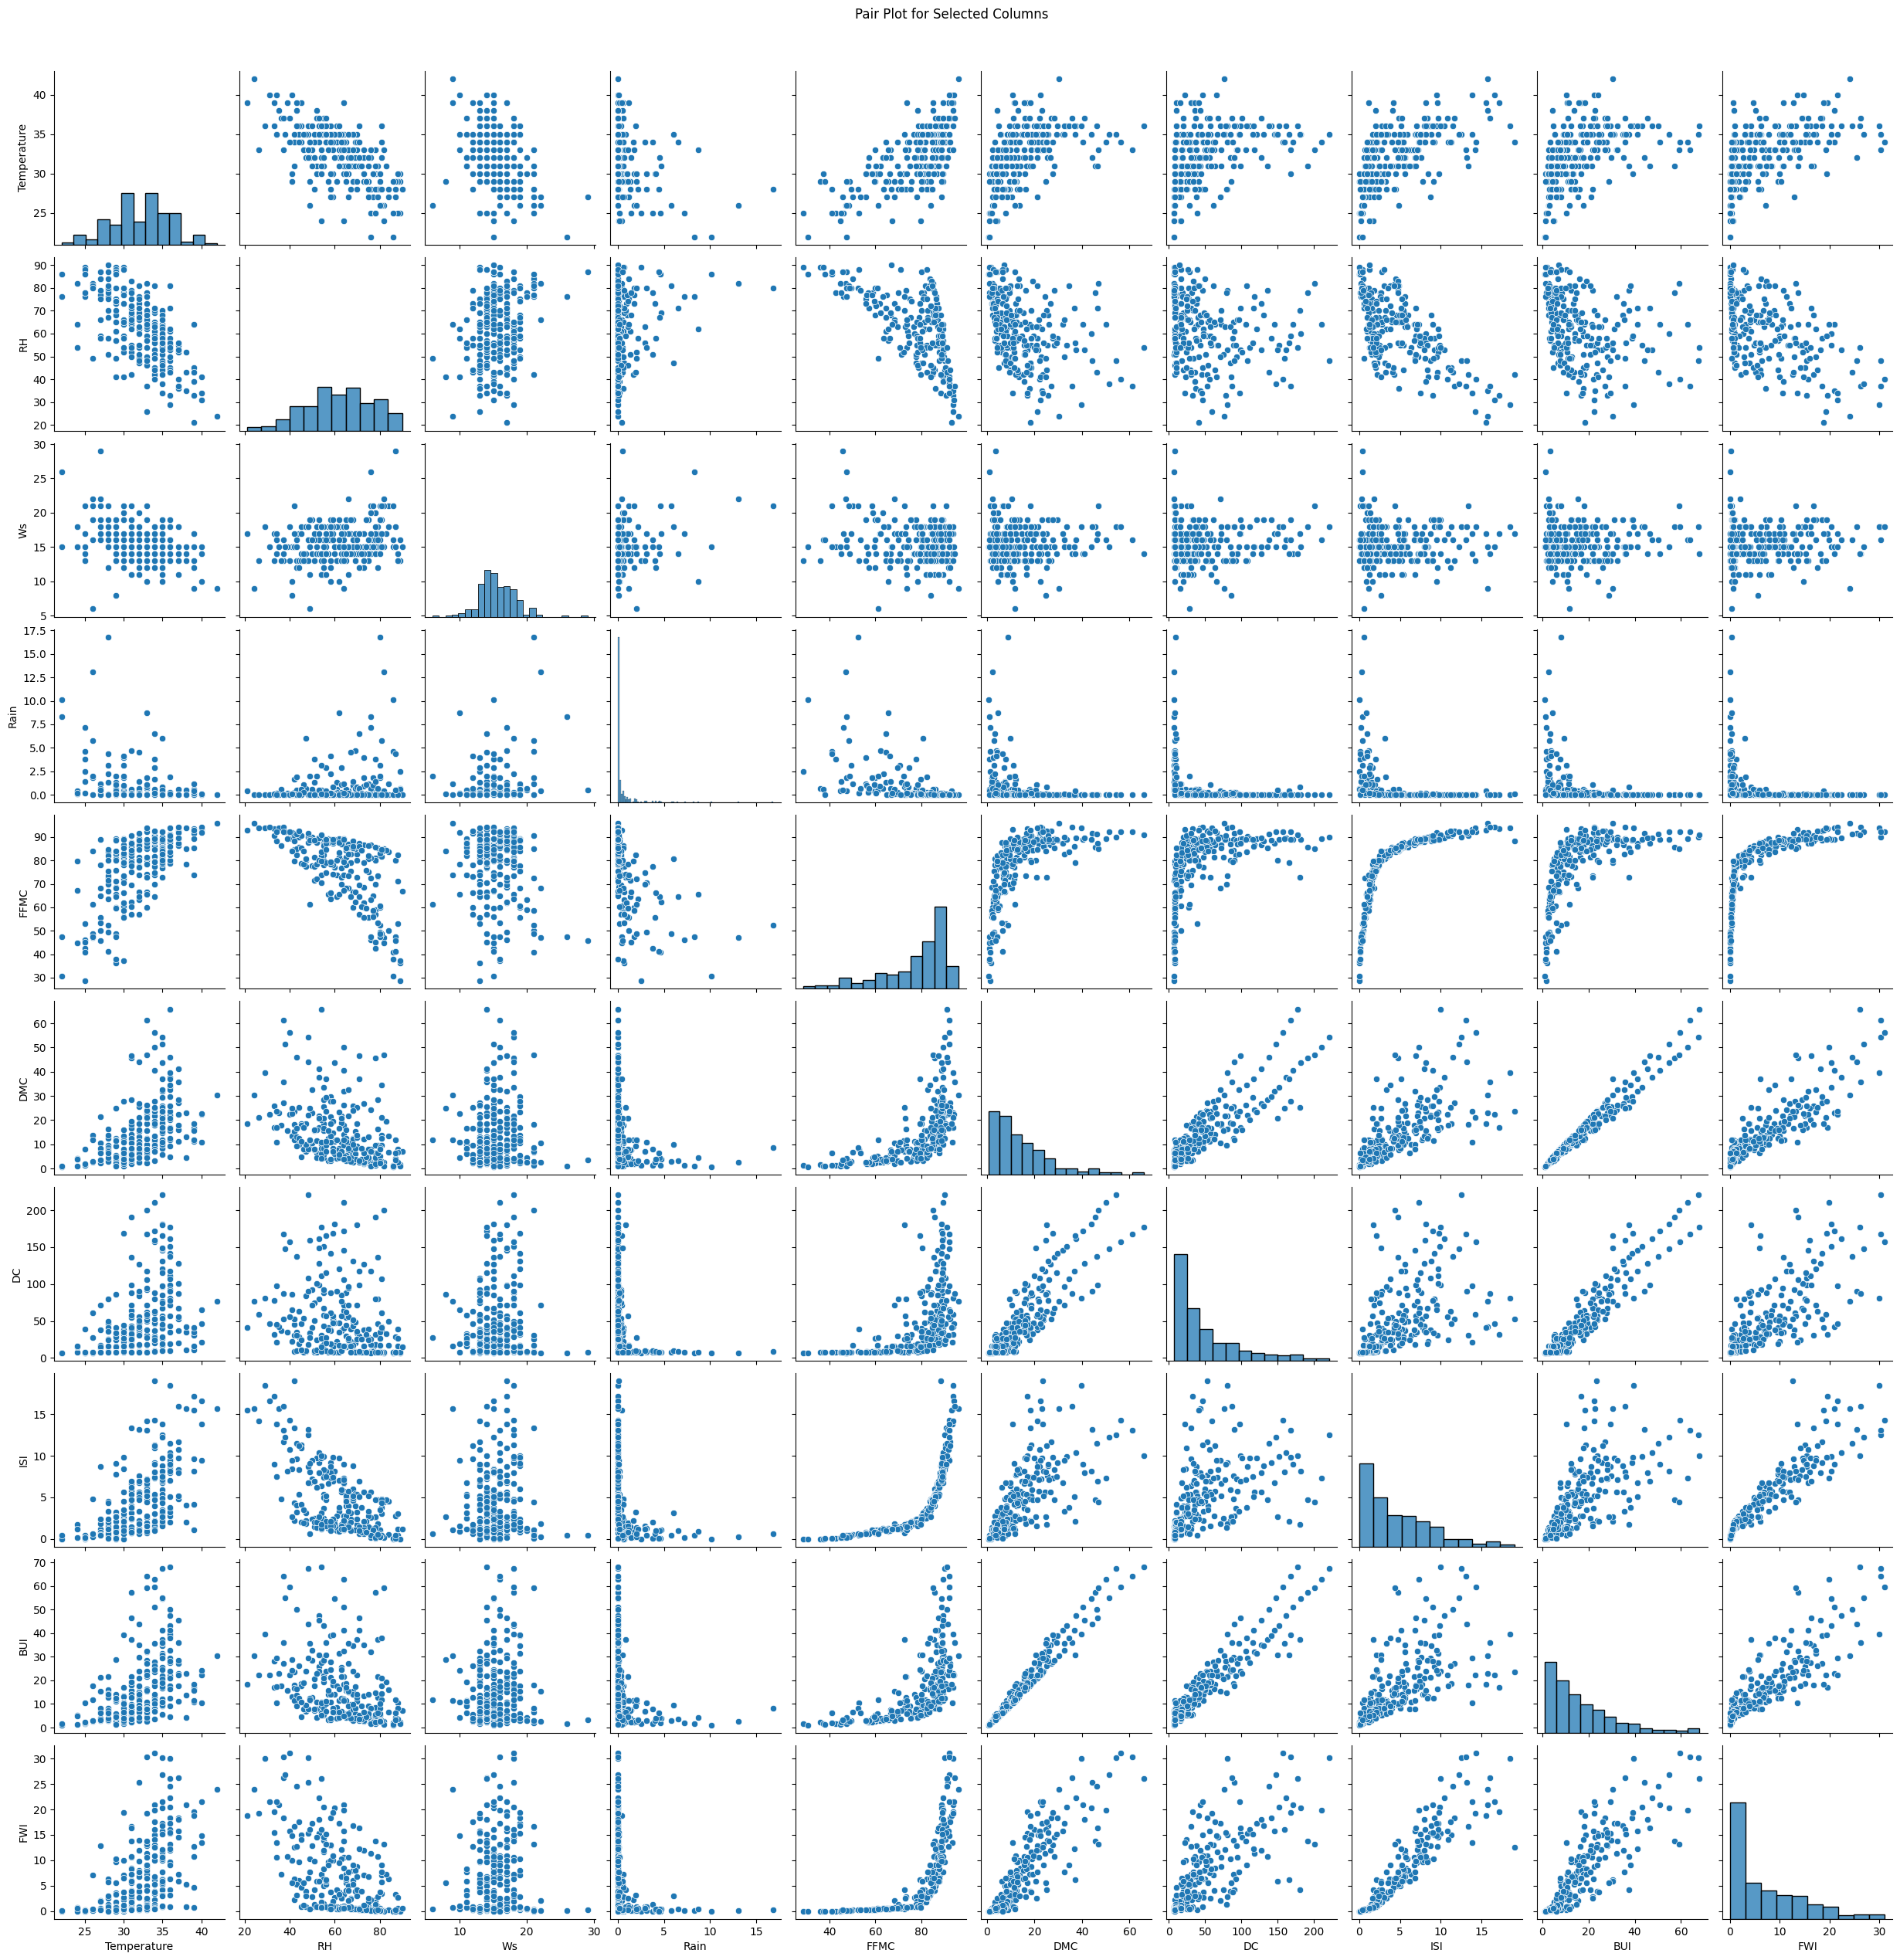

In [ ]:
# Display show relationships in terms of scatter plot, visualize the correlation of some columns

selected_columns = ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']
sns.pairplot(df[selected_columns])
plt.suptitle('Pair Plot for Selected Columns', y=1.02)
plt.show()





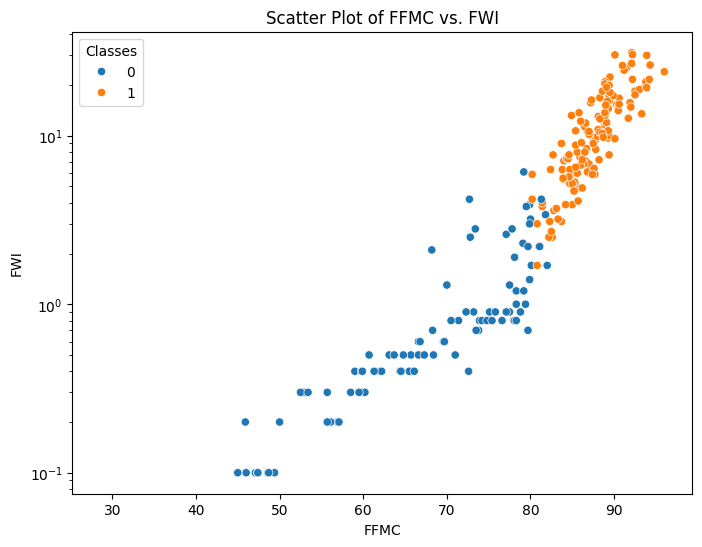

In [ ]:
# make a scatter plot FFMC column against FWI column using "Classes"

plt.figure(figsize=(8, 6))
sns.scatterplot(x='FFMC', y='FWI', hue='Classes', data=df)
plt.yscale('log')
plt.xlabel('FFMC')

plt.ylabel('FWI')
plt.title('Scatter Plot of FFMC vs. FWI')

plt.show()

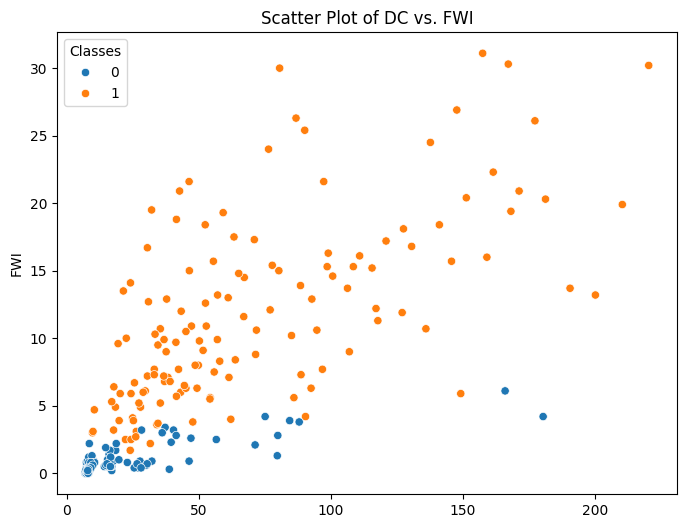

In [ ]:
# make a scatter plot FFMC column against FWI column using "Classes"

plt.figure(figsize=(8, 6))
sns.scatterplot(x='DC', y='FWI', hue='Classes', data=df)

plt.xlabel('')

plt.ylabel('FWI')
plt.title('Scatter Plot of DC vs. FWI')

plt.show()

# Exploratory Data Analysis

In [3]:
#Display of first five row

df.head()

#drop columns that necassry for the model building
df = df.drop(columns= ['day', 'month', 'year'], axis=1)
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [4]:
# Encoding the category column


df['Classes'] = np.where(df['Classes'].str.contains('not fire'), 0, 1)

#df_new.head()

df.head()


,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [5]:
# check value count for the 1 and 0

df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

<Axes: >

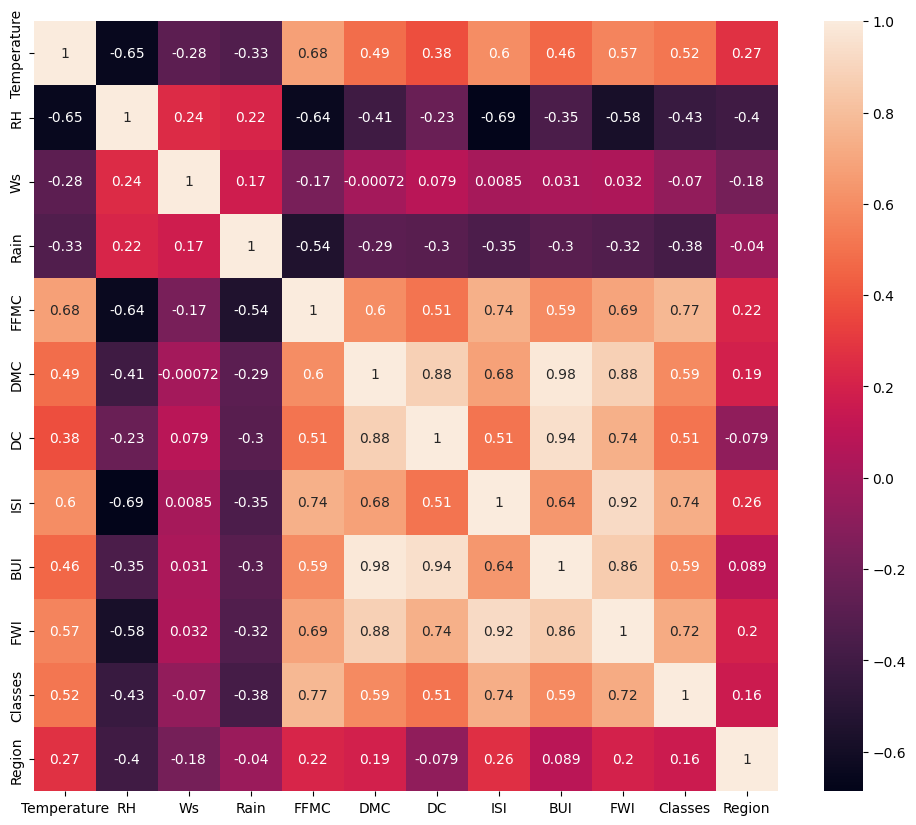

In [6]:
# correlation map to remove highly correlation columns
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True)

In [7]:
# Dependent  and  Independent features separation

y = df['FWI']
X= df.drop(columns=['FWI'], axis=1)

X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


**Splitting the dataset into train and test data**

In [8]:
#Spllitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


]

In [9]:
#Display rows and columns for train and test data

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(194, 11)
(49, 11)
(194,)
(49,)


Feature selection based correlation

<Axes: >

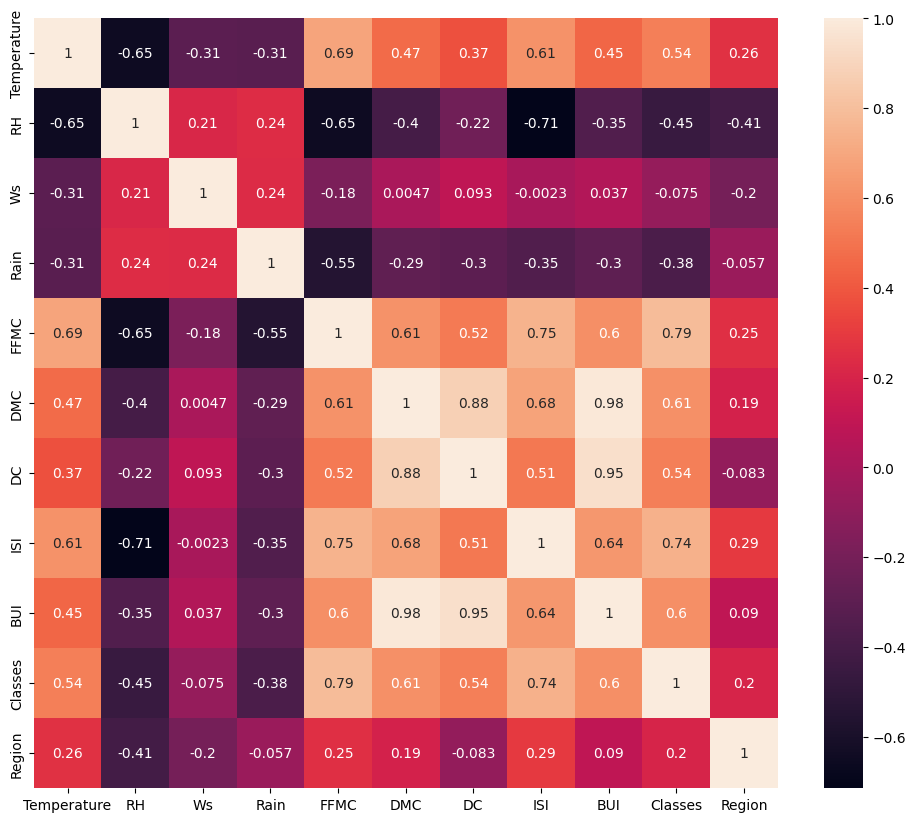

In [10]:
# check for multicolinearity
from re import X
plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr, annot=True)

**Check for Multicollinearity**

In [11]:

# threshold domain

def correlation(dataset, threshold):
  col_corr=set()
  corr_matrix=dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range (i):
      if abs(corr_matrix.iloc[i,j])>threshold:
        colname=corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr

corr_features=correlation(X_train, 0.85)

print( 'Multicollinearity features:', corr_features)


Multicollinearity features: {'DC', 'BUI'}


In [12]:
# Drop features awhen the correaltion > 0.85

X_train.drop(corr_features, axis=1, inplace=True)

X_test.drop(corr_features, axis=1, inplace=True)


In [ ]:
(X_train.shape), (X_test.shape)


((194, 9), (49, 9))

<Axes: >

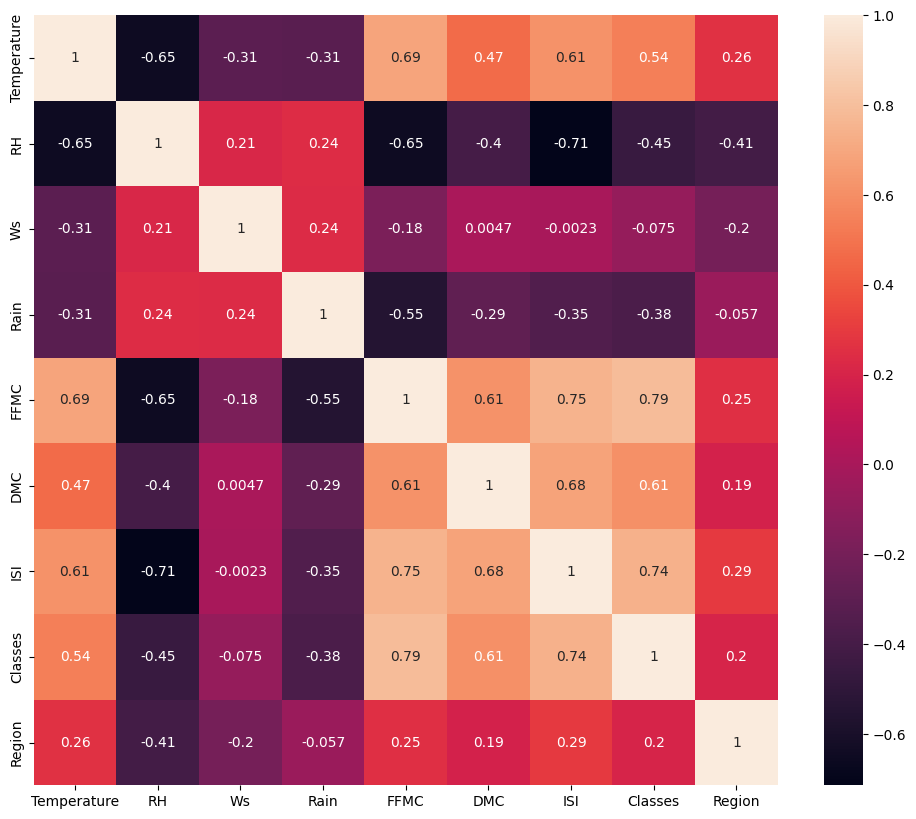

In [ ]:
# check for multicolinearity
from re import X
plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr, annot=True)

# Features Scaling and Standarization

In [13]:
# Import library for standardization
from sklearn.preprocessing import StandardScaler

# intialised the scaler
scaler=StandardScaler()

# fit and transform the training data and test data
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [14]:
# Display scaled train and test data
X_train_sc
X_test_sc



array([[-0.32677059,  0.14650162, -0.2352019 , -0.38015572,  0.61070375,
        -0.07699537,  0.17532762,  0.8738629 , -1.01036297],
       [ 0.22209084, -0.52066537, -0.99568804, -0.38015572,  0.71720269,
        -0.40637763,  0.33729694,  0.8738629 , -1.01036297],
       [-1.15006273, -0.25379858,  0.90552731,  0.6761624 , -1.02228009,
        -0.91960114, -0.86590375, -1.14434427,  0.98974332],
       [ 0.49652155, -0.25379858, -0.99568804, -0.2841268 ,  0.09950881,
         0.26770699, -0.65765748, -1.14434427,  0.98974332],
       [-0.60120131,  0.21321832, -0.61544497, -0.38015572,  0.51840466,
         0.06088557, -0.10233408,  0.8738629 ,  0.98974332],
       [ 1.86867512,  0.14650162, -2.51666033,  0.1960178 , -0.30518719,
        -0.26849668, -0.88904223, -1.14434427,  0.98974332],
       [-1.15006273,  0.8803853 ,  0.14504117, -0.38015572,  0.29120691,
        -0.82768051, -0.37999578,  0.8738629 ,  0.98974332],
       [ 1.31981369, -1.72156595, -0.99568804, -0.09206896,  0

# Boxplot to undestand effect of standard scaler

<ipython-input-15-b44477e42083>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


Text(0.5, 1.0, 'x_train after scaling')

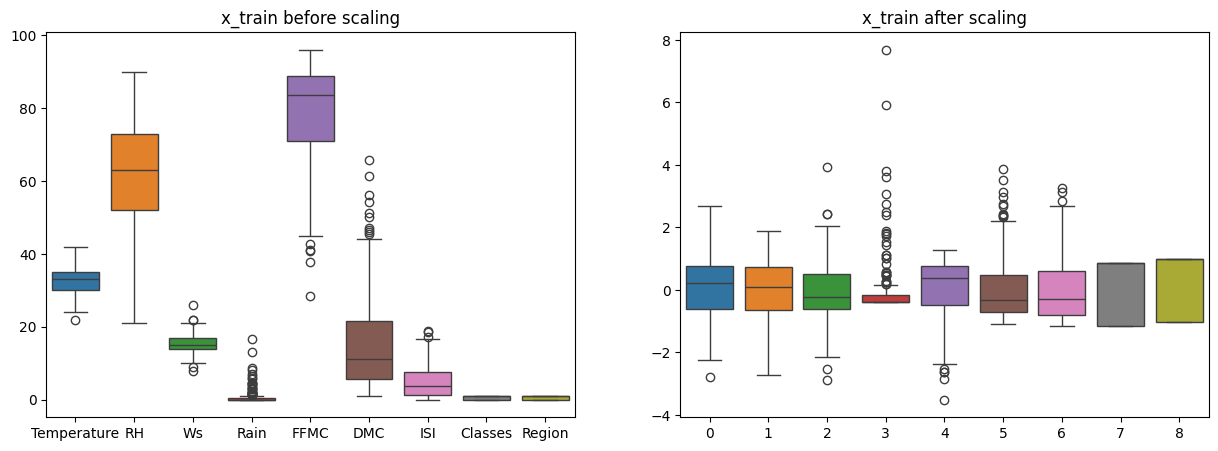

In [15]:
#  B0xplay display for train test before and after Scaling

plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('x_train before scaling')
plt.subplot(1,2,2)
sns.boxplot(data=X_train_sc)
plt.title('x_train after scaling')


# **MODEL BUILDING**

> Add blockquote



# Multiple Linear Regression

*   List item
*   List item



In [20]:
# Multiple Linear Regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, r2_score
lin_reg = LinearRegression()
lin_reg.fit(X_train_sc, y_train)
y_pred_lr = lin_reg.predict(X_test_sc)
mae_linreg = mean_absolute_error(y_test, y_pred_lr)
r2_linreg = r2_score(y_test, y_pred_lr)
print("Linear Regression MAE:",mae_linreg)
print("Linear Regression R2 Score:",r2_linreg)




Linear Regression MAE: 0.5049978694165687
Linear Regression R2 Score: 0.9805895859259882


# Polynomial Regression Model

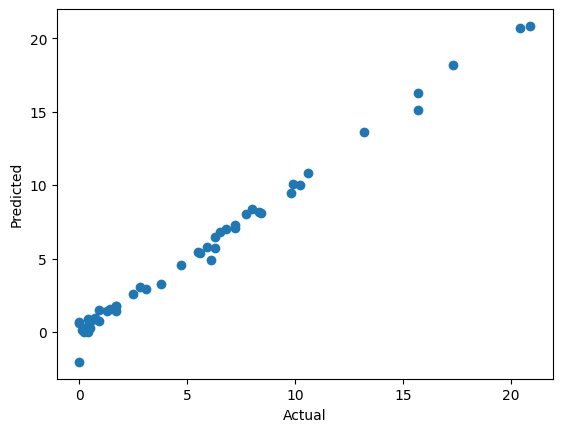

Polynomial Regression MAE: 0.3308192350426498
Polynomial Regression R2 Score: 0.992610659086529


In [21]:
# Polynomial Regression (degree 2)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly_reg = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_reg.fit(X_train_sc, y_train)
y_pred_pr = poly_reg.predict(X_test_sc)

poly_mae =  mean_absolute_error(y_test, y_pred_pr)
poly_r2 = r2_score(y_test, y_pred_pr)
plt.scatter(y_test, y_pred_pr)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

print("Polynomial Regression MAE:", poly_mae)
print("Polynomial Regression R2 Score:", poly_r2)

# Ridge Regression Model

In [22]:
# Ridge Regression
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train_sc, y_train)
y_pred_ridge = ridge_reg.predict(X_test_sc)
print("\nRidge Regression:")

ridge_mae = mean_absolute_error(y_test, y_pred_ridge)
print("MAE:", ridge_mae)
ridge__r2_score=  r2_score(y_test, y_pred_ridge)
print("R2 Score:", ridge__r2_score)



Ridge Regression:
MAE: 0.5192048325844797
R2 Score: 0.9801058063273599


# LASSO Regression Model


Lasso Regression:
MAE: 0.6776158719774494


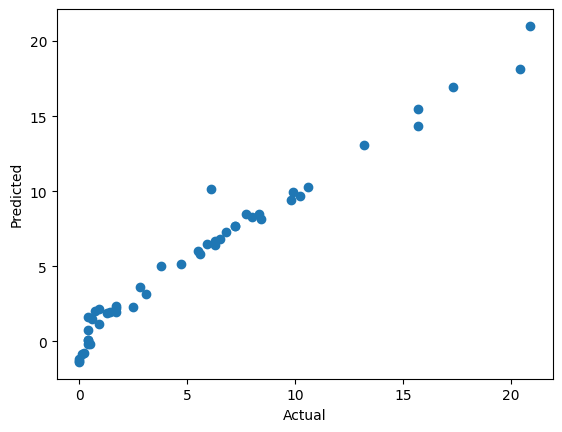

R2 Score: 0.9704027012816706


In [23]:
# Lasso Regression
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train_sc, y_train)
y_pred_lasso = lasso_reg.predict(X_test_sc)
print("\nLasso Regression:")
lasso_mae = mean_absolute_error(y_test, y_pred_lasso)
print("MAE:", lasso_mae)
lasso_r2Score =  r2_score(y_test, y_pred_lasso)

plt.scatter(y_test, y_pred_lasso)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()
print("R2 Score:", lasso_r2Score)

# Hyperparameter Tunning Polynomial Regression

In [24]:
# Polynomial Regression (degree 2)

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

poly_reg = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_scores = cross_val_score(poly_reg, X_train_sc, y_train, cv=5, scoring='neg_mean_squared_error')
poly_reg.fit(X_train_sc, y_train)

print("Polynomial Regression MAE:", mean_absolute_error(y_test, y_pred_pr))
print("Polynomial Regression R2 Score:", r2_score(y_test, y_pred_pr))

Polynomial Regression MAE: 0.3308192350426498
Polynomial Regression R2 Score: 0.992610659086529


# Hyperparameter Tunning Ridge Regression

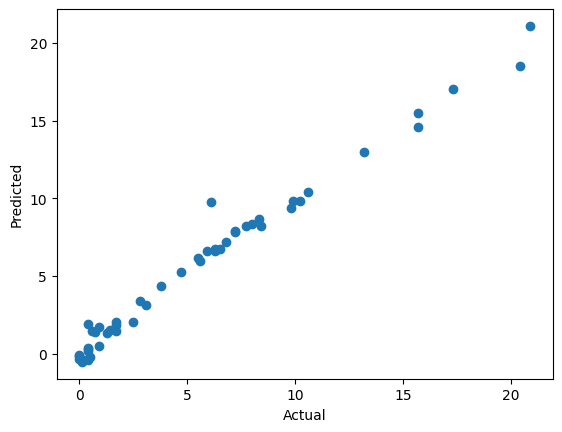


Ridge Regression:
MAE: 0.5192048325844797
R2 Score: 0.9801058063273599
Best- ridge: Ridge(alpha=1)
{'alpha': 1}
ridge_best_score: 0.954881923556721


In [25]:
# Hyperparameter tuning and cross-validation for Ridge Regression

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import Ridge
ridge = Ridge()
ridgeCv= Ridge()
ridge_params = {'alpha': [0.01, 0.1, 1, 1, 100]}
ridge_cv = GridSearchCV(ridge, ridge_params, cv=5)
ridge_cv.fit(X_train_sc, y_train)
best_ridge = ridge_cv.best_estimator_
y_pred_ridge = best_ridge.predict(X_test_sc)
ridgeCv_mae = mean_absolute_error(y_test, y_pred_ridge)
ridgeCv_r2 = r2_score(y_test, y_pred_ridge)
plt.scatter(y_test, y_pred_ridge)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

print("\nRidge Regression:")
print("MAE:", ridgeCv_mae)
print("R2 Score:", ridgeCv_r2)
print('Best- ridge:', best_ridge)
print(ridge_cv.best_params_)
print('ridge_best_score:', ridge_cv.best_score_)



# Hyperparameter Lasso Regression

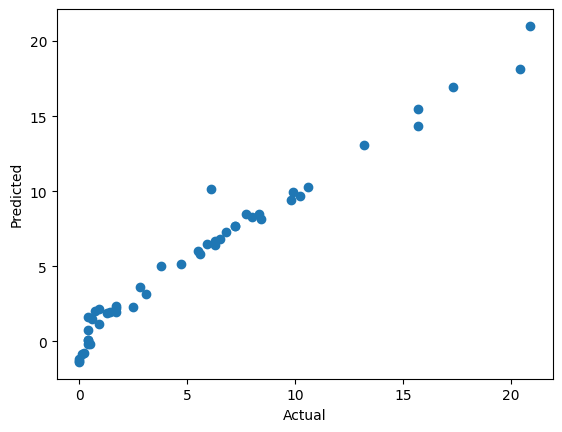

Lasso Regression:
MAE: 0.6776158719774494
R2 Score: 0.9704027012816706
Best-lasso: Lasso(alpha=0.1)
{'alpha': 0.1}
Best Score: 0.9548710197644643


In [26]:
# Hyperparameter tuning and cross-validation for Lasso Regression
lasso = Lasso()
lasso_params = {'alpha': [0.01, 0.1, 1, 0.1, 100]}
lasso_cv = GridSearchCV(lasso, lasso_params, cv=5)
lasso_cv.fit(X_train_sc, y_train)
y_pred_lasso = lasso_cv.predict(X_test_sc)
lassoCv_mae = mean_absolute_error(y_test, y_pred_lasso)
plt.scatter(y_test, y_pred_lasso)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()
print("Lasso Regression:")
print("MAE:", lassoCv_mae)

lassoCv_r2 = r2_score(y_test, y_pred_lasso)
print("R2 Score:", r2_score(y_test, y_pred_lasso))
best_lasso = lasso_cv.best_estimator_
print('Best-lasso:', best_lasso)
print(lasso_cv.best_params_)
print('Best Score:', lasso_cv.best_score_)



# Decision Tree Model

In [37]:

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score
#Decision Tree model
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
tree_mae = mean_absolute_error(y_test, y_pred_tree)
tree_r2 = r2_score(y_test, y_pred_tree)
print("Decision Tree Regression - MAE:", tree_mae)
print("Decision Tree Regression - R2:", tree_r2)


Decision Tree Regression - MAE: 1.0979591836734692
Decision Tree Regression - R2: 0.8785277334832842


# Decision Tree Model with Hyperparameter Tunning

In [39]:
# Decision Tree Regression with Hyperparameter Tuning
tree = DecisionTreeRegressor(random_state=42)
tree_params = {'max_depth': [3, 5, 7, 10], 'min_samples_split': [2, 5, 10]}
tree_grid_cv= GridSearchCV(tree, tree_params, cv=5, scoring='neg_mean_squared_error')
tree_grid_cv.fit(X_train, y_train)
best_tree = tree_grid_cv.best_estimator_
print('Best-tree:', best_tree)
print(tree_grid_cv.best_params_)
print('Best Score:', tree_grid_cv.best_score_)
y_pred_tree = best_tree.predict(X_test)
treecv_mae = mean_absolute_error(y_test, y_pred_tree)
treecv_r2 = r2_score(y_test, y_pred_tree)
print("Decision Tree Regression - MAE:", treecv_mae)
print("Decision Tree Regression - R2:", treecv_r2)


Best-tree: DecisionTreeRegressor(max_depth=5, min_samples_split=10, random_state=42)
{'max_depth': 5, 'min_samples_split': 10}
Best Score: -3.5921584996252234
Decision Tree Regression - MAE: 1.0891098785623425
Decision Tree Regression - R2: 0.8952124135542635


In [53]:
# import Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Converting to DataFrame for easier plotting
metrics = {
    "Models": ["Linear Regression", "Polynomial Regression", "Ridge Regression", "RidgeCV", "Lasso Regression", "Lasso RegressionCV","Decision Tree","Decision Tree_CV",],
    "MAE": [mae_linreg, poly_mae, ridge_mae, ridgeCv_mae, lasso_mae, lassoCv_mae, tree_mae, treecv_mae, ],
    "R2 Score": [r2_linreg, poly_r2, ridge__r2_score, ridgeCv_r2, lasso_r2Score, lassoCv_r2, tree_r2, treecv_r2,],
          }



                  Models       MAE  R2 Score
0      Linear Regression  0.504998  0.980590
1  Polynomial Regression  0.330819  0.992611
2       Ridge Regression  0.519205  0.980106
3                RidgeCV  0.519205  0.980106
4       Lasso Regression  0.677616  0.970403
5     Lasso RegressionCV  0.677616  0.970403
6          Decision Tree  1.097959  0.878528
7       Decision Tree_CV  1.089110  0.895212


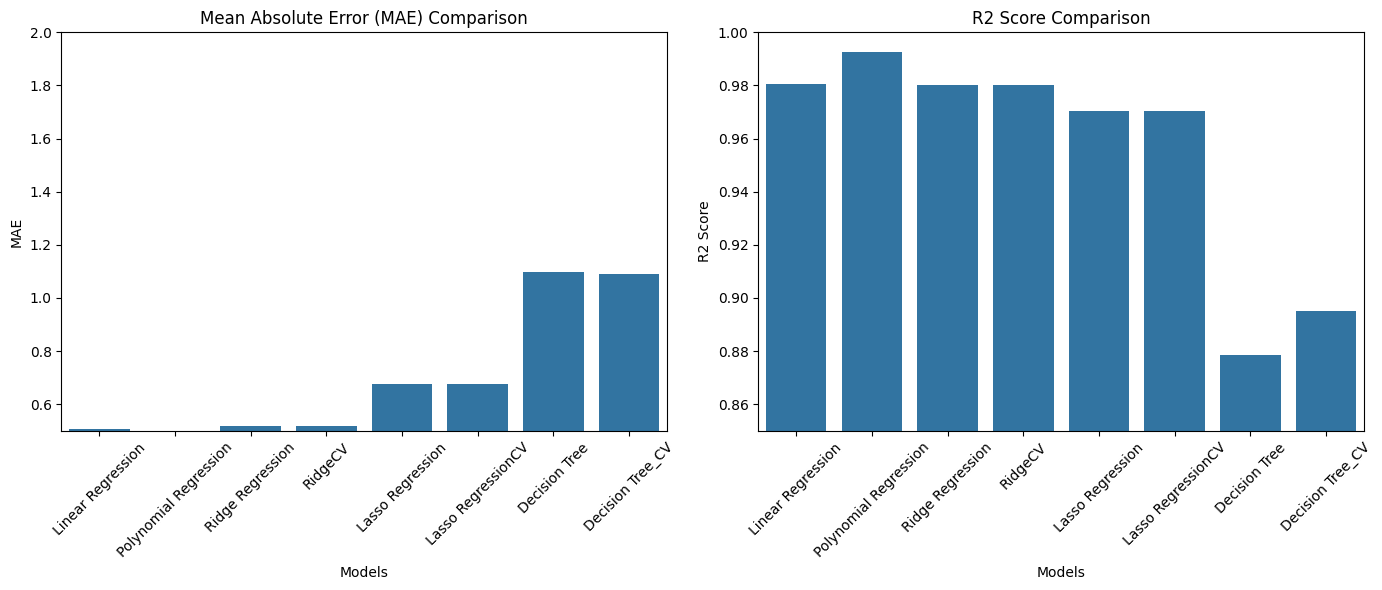

In [54]:
# Converting to DataFrame for easier plotting

df_metrics = pd.DataFrame(metrics)
print(df_metrics)
# Plotting
plt.figure(figsize=(14, 6))

# MAE Bar Plot
plt.subplot(1, 2, 1)
sns.barplot (x="Models", y="MAE", data=df_metrics)
plt.title("Mean Absolute Error (MAE) Comparison")
plt.xticks(rotation=45)
plt.ylim([0.5, 2])
plt.ylabel("MAE")

# R2 Score Bar Plot
plt.subplot(1, 2, 2)
sns.barplot(x="Models", y="R2 Score", data=df_metrics)
plt.title("R2 Score Comparison")
plt.xticks(rotation=45)
plt.ylim([0.85, 1])
plt.ylabel("R2 Score")

plt.tight_layout()
plt.show()


# **MODEL PERFORMANCE INTERPRETATION**


**-Linear Regression**

MAE: 0.504998
R2 Score: 0.980590
Interpretation: This model demonstrates a relatively low MAE and a high R² score, suggesting it makes fairly accurate predictions and accounts for a large portion of the variance in the target variable.


**Polynomial Regression**

MAE: 0.223959
R2 Score: 0.992611
Interpretation: This model exhibits the best performance among all listed models, with the lowest MAE and the highest R² score. It indicates very precise predictions and excellent explanatory power for the target variable.

**Ridge Regression**

MAE: 0.519205
R2 Score: 0.980106
Interpretation: Ridge Regression shows performance similar to Linear Regression, with a slightly higher MAE and a marginally lower R² score. It indicates good performance, though not as strong as Polynomial Regression.

**RidgeCV**

MAE: 0.519205
R2 Score: 0.980106
Interpretation: RidgeCV (Ridge Regression with cross-validation) has identical performance to Ridge Regression, indicating that cross-validation did not enhance the model's performance.

**Lasso Regression**

MAE: 0.677616
R2Score: 0.970403
Interpretation: This model has the highest MAE and the lowest R² score among all models, indicating it makes less accurate predictions and explains less variance in the target variable compared to the others.

**Lasso RegressionCV**

MAE: 0.677616
R2 Score: 0.970403
Interpretation: LassoCV (Lasso Regression with cross-validation) has the same performance as Lasso Regression, showing that cross-validation did not improve the model's effectiveness.


**Decision Tree**

MAE: 1.097959
R2 Score: 0.878528
Interpretation: This model has the highest MAE and the lowest R² score among all models, indicating it makes less accurate predictions and explains less variance in the target variable compared to the others.


**Decision Tree_CV**

MAE: 1.089110
R2 Score: 0.895212
Interpretation: This model shows slightly better performance than the regular Decision Tree model but still has a higher MAE and a lower R² score compared to the regression models, suggesting less accurate predictions and less explanatory power for the target variable.


# **SUMMARY**

Polynomial Regression shows the best performance, providing the most precise predictions and highest explanatory power. Linear and Ridge Regression models also perform well, while Lasso Regression and Decision Tree models exhibit lower accuracy and explanatory power

In [66]:
import pickle


# Serialize the models using pickle
with open('linear_model.pkl', 'wb') as f:
    pickle.dump(lin_reg, f)
with open('poly_model.pkl', 'wb') as f:
    pickle.dump(poly_reg, f)
with open('ridge_model.pkl', 'wb') as f:
    pickle.dump(ridge_reg, f)
with open('lasso_model.pkl', 'wb') as f:
    pickle.dump(lasso_reg, f)
with open('ridge_cv_reg_model.pkl', 'wb') as f:
    pickle.dump(ridge_cv, f)
with open('lasso_cv_reg_model.pkl', 'wb') as f:
    pickle.dump(lasso_cv, f)
with open('decision_tree_model.pkl', 'wb') as f:
    pickle.dump(tree_model, f)
with open('decision_tree_cv_model.pkl', 'wb') as f:
    pickle.dump(tree_grid_cv, f)

with open('lasso_cv_reg_model.pkl', 'wb') as f:
    pickle.dump(lasso_cv, f)

# Load and test the models on unseen data
unseen_data = pd.read_csv("/content/test_file.csv")

print(unseen_data)
X_unseen = unseen_data.drop(columns=['FWI'])
y_unseen = unseen_data['FWI']

# Load the models
with open('linear_model.pkl', 'rb') as f:
    loaded_linear_model = pickle.load(f)
with open('poly_model.pkl', 'rb') as f:
    loaded_poly_model = pickle.load(f)
with open('ridge_model.pkl', 'rb') as f:
    loaded_ridge_model = pickle.load(f)
with open('lasso_model.pkl', 'rb') as f:
    loaded_lasso_model = pickle.load(f)
with open('ridge_cv_reg_model.pkl', 'rb') as f:
    loaded_ridge_cv_model = pickle.load(f)
with open('lasso_cv_reg_model.pkl', 'rb') as f:
    loaded_lasso_cv_model = pickle.load(f)
with open('decision_tree_model.pkl', 'rb') as f:
    loaded_tree_model = pickle.load(f)
with open('decision_tree_cv_model.pkl', 'rb') as f:
    loaded_tree_cv_model = pickle.load(f)

# Ensure PolynomialFeatures is defined for polynomial regression
poly = PolynomialFeatures(degree=2)

# Predict and evaluate on unseen data
X_unseen_poly = poly.fit_transform(X_unseen)
X_unseen_poly = poly.transform(X_unseen)

print("Unseen Data - Linear Regression - MAE:", mean_absolute_error(y_unseen, loaded_linear_model.predict(X_unseen)))
print("Unseen Data - Polynomial Regression - MAE:", mean_absolute_error(y_unseen, loaded_poly_model.predict(X_unseen_poly)))
print("Unseen Data - Ridge Regression - MAE:", mean_absolute_error(y_unseen, loaded_ridge_model.predict(X_unseen)))
print("Unseen Data - Lasso Regression - MAE:", mean_absolute_error(y_unseen, loaded_lasso_model.predict(X_unseen)))
print("Unseen Data - Decision Tree Regression - MAE:", mean_absolute_error(y_unseen, loaded_tree_model.predict(X_unseen)))
print("Unseen Data - Decision Tree CV Regression - MAE:", mean_absolute_error(y_unseen, loaded_tree_cv_model.predict(X_unseen)))







   day  month  year  Temperature  RH  Ws  Rain  FFMC   DMC    DC  ISI   BUI  \
0           6  2012           29  57  18   0.0  65.7   3.4   7.6  1.3   3.4   
1    2      6  2012           29  61  13   1.3  64.4   4.1   7.6  1.0   3.9   
2    3      6  2012           26  82  22  13.1  47.1   2.5   7.1  0.3   2.7   
3    4      6  2012           25  89  13   2.5  28.6   1.3   6.9  0.0   1.7   
4    5      6  2012           27  77  16   0.0  64.8   3.0  14.2  1.2   3.9   
5   19      6  2012           31  55  16   0.1  79.9   4.5  16.0  2.5   5.3   
6   20      6  2012           30  80  16   0.4  59.8   3.4  27.1  0.9   5.1   
7   21      6  2012           30  78  14   0.0  81.0   6.3  31.6  2.6   8.4   
8   22      6  2012           31  67  17   0.1  79.1   7.0  39.5  2.4   9.7   
9   23      6  2012           32  62  18   0.1  81.4   8.2  47.7  3.3  11.5   
10  24      6  2012           32  66  17   0.0  85.9  11.2  55.8  5.6  14.9   
11  25      6  2012           31  64  15   0.0  86.7